# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import tweepy
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')
tweets.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
content = response.content
image_classification = pd.read_csv(io.StringIO(content.decode('utf-8')), sep='\t')
image_classification.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = '3y2MzSihbcA1tnLHCUsTa4OVW'
consumer_secret = 'eI8Ms0faWyvtl1Tzr3J99M3Qjr0VGKxRRBIGjvUMkWV8iDi8Cy'
access_token = '1495199229689708545-8rF0dA7Hno01uXU9EFVPMz0TwrwiEd'
access_secret = 'exPEe8sr9RbrQ1uXxNOJR8ipsYWEIDxPqZq4mWAkWlSha'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [5]:
# tweet_ids = tweets['tweet_id'].values
# fails_dict={}
# with open('tweet_json.txt', 'w') as outfile:
#    for tweet_id in tweet_ids:
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            fails_dict[tweet_id] = e
#            pass


In [6]:
data = []
with open('tweet_json.txt') as f:    
        for line in f:         
             data.append(json.loads(line))

In [7]:
tweet_engagement = pd.DataFrame(columns = ['tweet_id', 'tweet_characters', 'retweet_count', 'favorite_count'])
for entry in data:
    new_row = {'tweet_id': entry['id'],
               'tweet_characters': entry['display_text_range'][1],
               'retweet_count': entry['retweet_count'],
               'favorite_count' : entry['favorite_count']}
    tweet_engagement = tweet_engagement.append(new_row, ignore_index=True)

    

In [8]:
tweet_engagement.head(2)

,tweet_id,tweet_characters,retweet_count,favorite_count
0,892420643555336193,85,7090,34185
1,892177421306343426,138,5345,29639


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Visual Assessment

In [9]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
tweets.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
399,824796380199809024,NaN,NaN,2017-01-27 01:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bailey. She loves going...,7.950767e+17,4.196984e+09,2016-11-06 01:33:58 +0000,https://twitter.com/dog_rates/status/795076730...,11,10,Bailey,None,None,None,None
1887,674788554665512960,NaN,NaN,2015-12-10 03:11:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Maggie. She's a Western Septic Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674788554...,9,10,Maggie,None,None,None,None
1975,672997845381865473,NaN,NaN,2015-12-05 04:36:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672997845...,12,10,Kenzie,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
1588,686730991906516992,NaN,NaN,2016-01-12 02:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I just love this picture. 12/10 lovely af http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686730991...,12,10,None,None,None,None,None


Some issues to note visually:

****Quality****


* Some of the values in the name columns have values such as "a", "an", "quite", or "the". There could be more more words such as the ones outlined and they all relate by having the first letter lowercased. All names are uppercase. Hence, all the lowercase names should be dropped.
* Our reports only focus on original ratings. There are some retweet entries that should be dropped. 
* Some tweets were published prior to August 1, 2017, which means these tweets won't have access to the image_classification algorithm and results.


****Tidiness****


* The rating field should not be split into numerator or denominator headings. It should be evaluated as a single rating, which would be the calculated fraction.
* The dog stage fields should be combined into a single field, "dog_stage", that categorically assigns the type to each entry. For entries that have multiple dog_stages, the stages will be seperated by comma's.


In [11]:
image_classification

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
image_classification.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
761,688894073864884227,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053365,True
220,670086499208155136,https://pbs.twimg.com/media/CUygHhFXAAAwNXv.jpg,1,German_short-haired_pointer,0.273492,True,Staffordshire_bullterrier,0.132944,True,bluetick,0.124562,True
403,673700254269775872,https://pbs.twimg.com/media/CVl2ydUWsAA1jD6.jpg,1,water_bottle,0.614536,False,ashcan,0.050911,False,bucket,0.037432,False


Some issues to note visually:

****Quality****


* The predicted dog breads should be lowercased to ensure they all match.  
* The predicted binary success column should of in 0's or 1's instead of True or False for machine learning applications. 

In [13]:
tweet_engagement

,tweet_id,tweet_characters,retweet_count,favorite_count
0,892420643555336193,85,7090,34185
1,892177421306343426,138,5345,29639
2,891815181378084864,121,3517,22320
3,891689557279858688,79,7294,37355
4,891327558926688256,138,7832,35691
5,891087950875897856,138,2634,18018
6,890971913173991426,140,1686,10484
7,890729181411237888,118,15943,57471
8,890609185150312448,122,3661,24803
9,890240255349198849,133,6160,28283


In [14]:
tweet_engagement.sample(5)

,tweet_id,tweet_characters,retweet_count,favorite_count
2123,669625907762618368,98,1589,3163
1939,673317986296586240,119,221,797
2168,668779399630725120,123,327,642
2289,666437273139982337,138,41,106
1841,675147105808306176,128,202,851


Some issues to note:
    
****Tidiness****

* The tweet_engagement dataframe should be combined with the tweets dataframe as it has information relevant to each tweet. The join should occur at the tweet_id field. The image classification dataframe should also be joined to form one unified dataframe.

### Programmatic Assessment

In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

As mentioned, there are some tweets that are retweets to other tweets. These tweets should be discarded.

In addition, the timestamp field is of the object data-type when it should be set to the datetime data-type. 

In [16]:
tweets.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
an             7
Daisy          7
Bailey         7
Toby           7
Buddy          7
Rusty          6
Oscar          6
Koda           6
Milo           6
Dave           6
Stanley        6
Jack           6
Bella          6
Leo            6
Jax            6
Scout          6
Alfie          5
            ... 
Ambrose        1
Glacier        1
Rey            1
Duchess        1
Kramer         1
Kulet          1
Pepper         1
Farfle         1
Grizzwald      1
Fletcher       1
Jebberson      1
Naphaniel      1
Acro           1
Wesley         1
Burt           1
Pumpkin        1
Charl          1
Skittles       1
Noah           1
Brudge         1
Kevon          1
Dug            1
Humphrey       1
Shnuggles      1
Sonny          1
Dot            1
Winifred       1
Monty         

In [17]:
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

There are some unrealistic numerator ratings that do not reflect the true sentiment of the rating. This is most likely caused by the data-type being of the integer data-type. These unrealistic values should be classified as outliers and corrected.

In [18]:
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

As with the numerator values, the denominators are consistent aside from some values being different than 10. These values will need to be addressed on a case by case basis.

In [19]:
tweets.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

The values of the name columns have two seperate issues:

1. Some name values are unrealistic names such as "the", "a", or "an".
2. For multiple entries in the name and dog_stage columns, the values are "None." These should be corrected to reflect null values and therefore re-assigned to the default NaN value.

In [20]:
image_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_classification.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

The image_classification dataframe is complete and all fields are of the appropiate data-types. The only minor detail to fix would be to lowercase all the objects from the guesses as it could lead to inconsistencies with future data explorations. 

In [22]:
tweet_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
tweet_id            2325 non-null object
tweet_characters    2325 non-null object
retweet_count       2325 non-null object
favorite_count      2325 non-null object
dtypes: object(4)
memory usage: 72.7+ KB


The re-tweet, favorite, and tweet characters fields should all be set to the integer data-type.

In [23]:
tweet_engagement.tweet_characters.value_counts()

140    251
139    145
138     79
137     77
116     58
136     50
115     50
134     44
135     41
112     38
113     35
133     34
130     33
114     32
98      31
110     30
107     27
127     27
108     26
131     26
103     25
104     25
106     25
111     25
102     25
123     24
120     24
96      23
118     23
117     23
      ... 
40       4
58       4
50       4
44       3
45       3
38       3
49       3
141      3
18       3
35       2
147      2
48       2
22       1
21       1
13       1
20       1
25       1
29       1
26       1
28       1
165      1
31       1
32       1
36       1
42       1
43       1
148      1
142      1
145      1
11       1
Name: tweet_characters, Length: 125, dtype: int64

All of the dataframes should have the tweet ID field set to the string data-type to avoid any automatic rounding, leading 0's reduction, or error in comparison in future analysis. 

### Quality issues

1. All of the dataframes are currently setting the tweet ID to the integer data-type. Converting these values to strings will help eliminate any errors relating to data entry, automatic rounding, or leading 0 inconsistencies. The ID's are also not intended to be used for calculation.


2. The name field in the tweet dataset has values such as "the", "an", "a", and "quite". There are other values such as the ones mentioned and what they have in common is that they all begin with a lowercase letter. All names are uppercased in contrast. Setting these lowercase instances to NaN values will elimiate these unrealistic entries.


3. Multiple entries in the name and dog stage fields that are null are set to "None" which should be reverted to NaN.


4. The timestamp field in the tweets dataframe should be converted to the datetime data-type instead of the current string datatype.


5. The predicted dog breeds should all be lowercased to ensure consistency in the names.


6. The retweet, favorite, and character count of the tweet_engagement dataframe are all set to strings when they should be set to the integer data-type to assist with calculations.


7. The tweet dataframe currently has tweets that are retweets to other tweets. These are not relevant to the study and should be dropped. 


8. The ratings currently included some incorrect and unrealistic values. Moreover, there are ratings that were not acquired correctly from the tweet text. Currently, there are two fields that represent a single variable - the rating. There should be a single rating from the numerator and denominator fields and any outliers shouuld be dropped from the dataframe. 


### Tidiness issues

1. All dataframes should be merged into a single dataframe based on Tweet ID to have a collected, single dataframe for future analysis. 


2. The dog stage fields in the tweets dataframe should all be combined into a single field in which the values indicate the dog_stage.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
tweets_clean = tweets.copy()
image_classification_clean = image_classification.copy()
tweet_engagement_clean = tweet_engagement.copy()


### Issue #1:

All of the dataframes are currently setting the tweet ID to the integer data-type. This field is not intended for calculations, so it should be converted to the string data-type.

#### Define: 

Convert the all the ID-related fields in the tweets and imagde_classification dataframes to the string data-type.

In [25]:
tweets_clean = tweets_clean.astype({"tweet_id": str, 
                                    "in_reply_to_status_id" : str,
                                    "in_reply_to_user_id" : str},
                                   errors='raise')
# The retweeted_status_user_id and retweeted_status_id fields will be used in further cleaning and dropped, therefore changing their data-type is not necessary in this step.
image_classification_clean = image_classification_clean.astype({"tweet_id" : str}, errors='raise')


#### Test

In [26]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2),

In [27]:
image_classification_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #2:

The name field in the tweet dataset has values such as "the", "an", "a", and "quite". There are other values such as the ones mentioned and what they have in common is that they all begin with a lowercase letter. All names are uppercased in contrast.

#### Define

Setting these lowercased instances to NaN values will elimiate these unrealistic entries.

#### Code

In [28]:
# Filling the NaN values with placeholder texts allows .islower() to execute without NaN specific exception.
tweets_clean['name'].fillna('placeholder_text')
tweets_clean[tweets_clean['name'].str.islower()] = np.nan

#### Test

In [29]:
tweets_clean['name'].value_counts()

None         745
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Stanley        6
Milo           6
Scout          6
Rusty          6
Koda           6
Oscar          6
Leo            6
Jack           6
Dave           6
Jax            6
Bella          6
Alfie          5
Bentley        5
Gus            5
George         5
            ... 
Remy           1
Duchess        1
Kramer         1
Jo             1
Goliath        1
Carbon         1
Tilly          1
Acro           1
Humphrey       1
Wesley         1
Burt           1
Pumpkin        1
Charl          1
Skittles       1
Grizzwald      1
Noah           1
Kevon          1
Dug            1
Shnuggles      1
Kulet          1
Sonny          1
Dot            1
Winifred       1
Sprinkles      1
Monty          1
Alf            1
Brudge         1
Farfle        

### Issue #3:

Multiple entries in the name and dog stage fields in the tweets dataframe that are null are set to "None" which should be reverted to NaN.

#### Define

Convert all "None" values in the name and dog stage fields to NaN in the tweets dataframe.

#### Code

In [30]:
def replaceNoneTweets(fields):
    for field in fields:
        tweets_clean[field].replace('None', np.nan, inplace=True)

replaceNoneTweets(['name', 'doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [31]:
tweets_clean['name'].value_counts()

Charlie      12
Cooper       11
Lucy         11
Oliver       11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Bailey        7
Toby          7
Buddy         7
Daisy         7
Stanley       6
Jack          6
Jax           6
Dave          6
Koda          6
Scout         6
Milo          6
Bella         6
Leo           6
Rusty         6
Oscar         6
Sunny         5
Phil          5
Oakley        5
Larry         5
Bentley       5
             ..
Remy          1
Duchess       1
Kramer        1
Jo            1
Goliath       1
Carbon        1
Tilly         1
Acro          1
Humphrey      1
Wesley        1
Burt          1
Pumpkin       1
Charl         1
Skittles      1
Grizzwald     1
Noah          1
Kevon         1
Dug           1
Shnuggles     1
Kulet         1
Sonny         1
Dot           1
Winifred      1
Sprinkles     1
Monty         1
Alf           1
Brudge        1
Farfle        1
Pete          1
Emma          1
Name: name, Length: 931,

### Issue #4:

The timestamp field in the tweets dataframe is of the string data-type and should be converted to datetime to allow for time-based analysis.

#### Define

Convert the timestamp field in the tweets dataframe to a datetime data-type.

#### Code

In [32]:
tweets_clean['timestamp'] = pd.to_datetime(tweets_clean['timestamp'], infer_datetime_format=True) 

#### Test

In [33]:
tweets_clean['timestamp'].dtype

dtype('<M8[ns]')

### Issue #5:

The predicted dog breeds should all be lowercased to ensure consistency in the names of breeds.

#### Define

Convert all the strings in the p1, p2, and p3 columns in the image_classification dataframe to be lowercased characters.

#### Code

In [34]:
image_classification_clean['p1'] = image_classification_clean['p1'].str.lower()
image_classification_clean['p2'] = image_classification_clean['p2'].str.lower()
image_classification_clean['p3'] = image_classification_clean['p3'].str.lower()

#### Test

In [35]:
image_classification_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1491,782747134529531904,https://pbs.twimg.com/media/CtzgXgeXYAA1Gxw.jpg,1,golden_retriever,0.560699,True,otterhound,0.199482,True,clumber,0.040682,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,norfolk_terrier,0.129114,True,pomeranian,0.120822,True
1850,840268004936019968,https://pbs.twimg.com/media/C6k7SaEXUAg83_J.jpg,3,chesapeake_bay_retriever,0.863987,True,labrador_retriever,0.052632,True,kelpie,0.032574,True
1477,780543529827336192,https://pbs.twimg.com/media/CtUMLzRXgAAbZK5.jpg,1,golden_retriever,0.628312,True,labrador_retriever,0.317365,True,tibetan_mastiff,0.012260,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,saluki,0.122079,True,irish_wolfhound,0.004020,True


### Issue #6:

The retweet, favorite, and character count of the tweet_engagement dataframe are all set to strings when they should be set to the integer data-type to assist with calculations.

#### Define
Convert all the retweet, favorite, and character text length columns to the integer data-type.

#### Code

In [36]:
tweet_engagement_clean

,tweet_id,tweet_characters,retweet_count,favorite_count
0,892420643555336193,85,7090,34185
1,892177421306343426,138,5345,29639
2,891815181378084864,121,3517,22320
3,891689557279858688,79,7294,37355
4,891327558926688256,138,7832,35691
5,891087950875897856,138,2634,18018
6,890971913173991426,140,1686,10484
7,890729181411237888,118,15943,57471
8,890609185150312448,122,3661,24803
9,890240255349198849,133,6160,28283


In [37]:
tweet_engagement_clean = tweet_engagement_clean.astype({"tweet_characters": int, 
                                    "retweet_count" : int,
                                    "favorite_count" : int},
                                   errors='raise')

#### Test

In [38]:
tweet_engagement_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
tweet_id            2325 non-null object
tweet_characters    2325 non-null int64
retweet_count       2325 non-null int64
favorite_count      2325 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


### Issue #7:

The tweet dataframe currently has tweets that are retweets or replies to other tweets. These are not relevant to the study and should be dropped.

#### Define

Drop all the entries of tweets that are retweets to other tweets. These tweets should have non-null values for the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp fields in the tweets dataframe. After using these fields to detect retweets and replies, they will be dropped.

#### Code

In [39]:
non_null_indices = tweets_clean.loc[tweets_clean['retweeted_status_id'].notnull()].index

In [40]:
tweets_clean.drop(tweets_clean.index[non_null_indices], inplace=True)

#### Test

In [41]:
tweets_clean.loc[tweets_clean['retweeted_status_id'].notnull()].index

Int64Index([], dtype='int64')

In [42]:
tweets_clean.loc[tweets_clean['retweeted_status_user_id'].notnull()].index

Int64Index([], dtype='int64')

In [43]:
tweets_clean.loc[tweets_clean['retweeted_status_timestamp'].notnull()].index

Int64Index([], dtype='int64')

In [44]:
tweets_clean.drop(inplace= True, columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

### Issue #8:

The ratings currently included some incorrect and unrealistic values. Moreover, there are ratings that were not acquired correctly from the tweet text. Currently, there are two fields that represent a single variable - the rating.

#### Define

Form a single rating field from both rating fields first removing any NaN values. From this single field, remove any outliers.

#### Code

In [45]:
tweets_clean.dropna(subset=['rating_numerator', 'rating_denominator'], inplace=True)

In [46]:
tweets_clean['rating'] = tweets_clean['rating_numerator'] / tweets_clean['rating_denominator']

In [47]:
Q1 = tweets_clean['rating'].quantile(0.25)
Q3 = tweets_clean['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5*IQR, Q3 + 1.5*IQR
lower_bound, upper_bound

(0.7000000000000001, 1.5)

In [48]:
tweets_clean = tweets_clean[(tweets_clean>=lower_bound)&(tweets_clean<=upper_bound)]

In [49]:
tweets_clean.dropna(subset=['rating'], inplace=True)

In [50]:
tweets_clean.drop(columns = ['rating_numerator', 'rating_denominator'], inplace=True)

#### Test

In [51]:
# Testing for null values in rating 
tweets_clean['rating'].isnull().any()

False

In [52]:
# Confirming realistic rating values.
tweets_clean['rating'].value_counts()

1.200000    487
1.000000    421
1.100000    415
1.300000    300
0.900000    142
0.800000     91
1.400000     39
0.818182      1
0.733333      1
1.250000      1
1.500000      1
Name: rating, dtype: int64

In [53]:
# Confirming columns were dropped correctly.
tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,NaN,NaN,NaN,1.2


### Issue #9:

There are three different dataframes wrangled from different sourced used to describe information about tweets. Before analysis, they should be joined together into a single dataframe.

#### Define

All dataframes should be merged into a single dataframe based on Tweet ID to have a collected, single dataframe for future analysis. 

#### Code

In [54]:
tweet_engagement_clean['tweet_id'] = tweet_engagement_clean['tweet_id'].astype(str)

In [55]:
df = tweet_engagement_clean.merge(tweets_clean,on='tweet_id')

In [56]:
df = df.merge(image_classification_clean, on='tweet_id')

#### Test

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 27 columns):
tweet_id                 1728 non-null object
tweet_characters         1728 non-null int64
retweet_count            1728 non-null int64
favorite_count           1728 non-null int64
in_reply_to_status_id    1728 non-null object
in_reply_to_user_id      1728 non-null object
timestamp                1728 non-null datetime64[ns]
source                   1728 non-null object
text                     1728 non-null object
expanded_urls            1728 non-null object
name                     1255 non-null object
doggo                    69 non-null object
floofer                  8 non-null object
pupper                   189 non-null object
puppo                    23 non-null object
rating                   1728 non-null float64
jpg_url                  1728 non-null object
img_num                  1728 non-null int64
p1                       1728 non-null object
p1_conf               

### Issue #10:

The dog stage fields in the tweets dataframe should all be combined into a single field in which the values indicate the dog_stage. Currently there are three different fields for one variable.

#### Define

Combine the dog stage fields in the master df into a single column which represents the dog stage for that entry.

#### Code

In [58]:
df['floofer'].fillna('', inplace=True)
df['puppo'].fillna('', inplace=True)
df['doggo'].fillna('', inplace=True)
df['pupper'].fillna('', inplace=True)

In [59]:
df['dog_stage'] = df['floofer'] + df['puppo'] + df['doggo'] + df['pupper']

In [60]:
df.loc[df['dog_stage'] == 'flooferdoggo', 'dog_stage'] = 'floofer,doggo'
df.loc[df['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df.loc[df['dog_stage'] == 'puppodoggo', 'dog_stage'] = 'puppo,doggo'

In [61]:
df['dog_stage'].replace('', np.nan, inplace=True)

In [62]:
df.drop(columns = ['floofer', 'doggo', 'pupper', 'puppo'], inplace=True)

#### Test

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1728 entries, 0 to 1727
Data columns (total 24 columns):
tweet_id                 1728 non-null object
tweet_characters         1728 non-null int64
retweet_count            1728 non-null int64
favorite_count           1728 non-null int64
in_reply_to_status_id    1728 non-null object
in_reply_to_user_id      1728 non-null object
timestamp                1728 non-null datetime64[ns]
source                   1728 non-null object
text                     1728 non-null object
expanded_urls            1728 non-null object
name                     1255 non-null object
rating                   1728 non-null float64
jpg_url                  1728 non-null object
img_num                  1728 non-null int64
p1                       1728 non-null object
p1_conf                  1728 non-null float64
p1_dog                   1728 non-null bool
p2                       1728 non-null object
p2_conf                  1728 non-null float64
p2_dog        

In [64]:
df['dog_stage'].value_counts()

pupper           182
doggo             60
puppo             22
doggo,pupper       7
floofer            7
puppo,doggo        1
floofer,doggo      1
Name: dog_stage, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

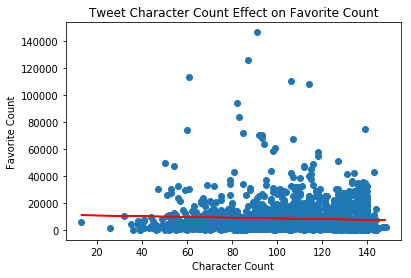

In [66]:
x = df['tweet_characters']
y = df['favorite_count']
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color="r")

plt.title('Tweet Character Count Effect on Favorite Count')
plt.xlabel('Character Count')
plt.ylabel('Favorite Count')

plt.show()

Text(0,0.5,'Favorite Count')

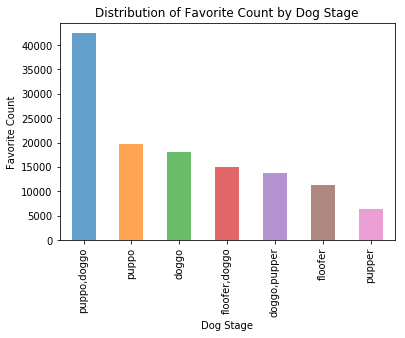

In [67]:
stage_favorite = df.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)
stage_favorite.plot(kind='bar', title='Distribution of Favorite Count by Dog Stage', alpha=.7);
plt.xlabel('Dog Stage')
plt.ylabel('Favorite Count')

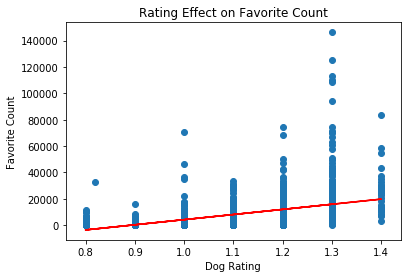

In [68]:
x = df['rating']
y = df['favorite_count']
plt.scatter(x, y)

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b,color="r")

plt.title('Rating Effect on Favorite Count')
plt.xlabel('Dog Rating')
plt.ylabel('Favorite Count')

plt.show()

### Insights:

From the visualizations created, the following insights can be made: 


1. Generally, there is little-to-no correlation between a tweet's character length and their favorite count. However, the trend line does suggest that there is a weak, negative correlation between the two.


2. The dog stages that receive the most average favorite counts are puppo's and doggo's. The ones that receive the least average favorite counts are floofers and puppers. 


3. There is an observed positive correlation between the rating a dog image is given and the favorite count on the same tweet. 

### Visualization

(array([ 735903.,  735964.,  736024.,  736085.,  736146.,  736208.,
         736269.,  736330.,  736389.,  736450.,  736511.,  736573.]),
 <a list of 12 Text xticklabel objects>)

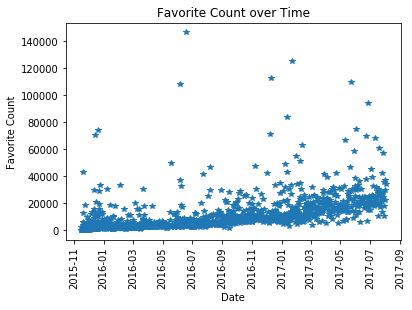

In [69]:
timestamp = df.sort_values('timestamp', ascending=True)
plt.plot(timestamp['timestamp'], timestamp['favorite_count'], '*')
plt.xlabel('Date')
plt.ylabel('Favorite Count')
plt.title('Favorite Count over Time')
plt.xticks(rotation='vertical')

There is a minimal increase in the amount of favorites tweets published have received over time.